# Analyzing Machine Learning algorithms using grid search

### Following and modifiying a tutorial given by https://towardsdatascience.com/a-beginners-guide-to-text-classification-with-scikit-learn-632357e16f3a

## Data analysis

Analyzing performance of the given algorithms for text sentiment classification - IMDb dataset.

Algorithms that will be analyzed are given with the next list:
* Decision Tree
* Support Vector Machine(s)
* Logistic Regression
First and foremost, loading the dataset using *pandas* library.

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Djordje\Downloads\IMDB Dataset.csv")

df_pos = df[df['sentiment']=='positive'][:5000]
df_neg = df[df['sentiment']=='negative'][:5000]
df = pd.concat([df_pos, df_neg])

Loaded Dataframe contains user reviews and related sentiment (positive or negative):

In [2]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
10038,It SURPRISINGLY had a plot! ;) I've seen movie...,negative
10039,I suppose I'm supposed to take something like ...,negative
10044,This is strictly for Pryor fans. Just because ...,negative
10047,The only saving grace of this movie is that it...,negative


To visually represent given dataset:

<AxesSubplot:>

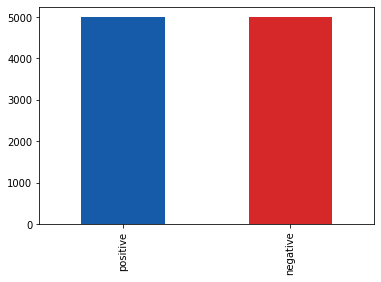

In [3]:
import matplotlib.pyplot as plt
colors = ['#165BAA', '#d62828']
df.sentiment.value_counts().plot(kind='bar',color=colors)

Classes are fairly balanced.

To train any machine learning model, this dataset needs to be shuffled and split into test and train datasets. Shuffling ensures generalization ability of a model. 

This particular dataset contains independent attribute *review* which can be classified as _negative_ or _positive_ sentiment. The idea is to train a particular model to predict sentiment from the review and then test its ability on test set.

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25, random_state=42)
train_x, train_y = train.review, train.sentiment
test_x, test_y = test.review, test.sentiment

Dataset is split into train set, which contains 75% of observations, and test set, containing the rest. 

This dataset consists of textual reviews. For a machine to be able to process it correctly, it needs to be converted to a numeric dataset. One way of doing this is to identify unique words of interest in each of the sentiment classes, by having them represented by a vector of weighted values corresponding to each word's frequency in a review. These values are in range (0-1) and their value increases proportionately to it's corresponding word's frequency. This technique is known as TF-IDF Vectorization.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
train_x = tfidf.fit_transform(train_x)

In [6]:
train_x

<7500x46285 sparse matrix of type '<class 'numpy.float64'>'
	with 667581 stored elements in Compressed Sparse Row format>

Attributes and features used for training the models are now represented by a sparse matrix with cells containing TF-IDF vectorized values.\
Next step is to do the same with test dataset features.

In [7]:
test_x = tfidf.transform(test_x)

## Machine learning models comparison and selection

This problem represents a classification problem, inputs and outputs are labeled and specified, so the preferred algorithms to solve this problem are Supervised learning algorithms.

### Support Vector Machines

In [8]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x, train_y)

SVC(kernel='linear')

Adding a few generic reviews to test model's ability to predict the sentiment

In [9]:
print(svc.predict(tfidf.transform(['A truly great movie.'])))
print(svc.predict(tfidf.transform(['A masterpiece.'])))
print(svc.predict(tfidf.transform(['Incredibly bad movie. Very predictable plot.'])))

['positive']
['positive']
['negative']


## Decision Tree

Repeat the same process for the Decision Tree classifier.

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [11]:
print(tree.predict(tfidf.transform(['A truly great movie.'])))
print(tree.predict(tfidf.transform(['A masterpiece.'])))
print(tree.predict(tfidf.transform(['Incredibly bad movie. Very predictable plot.'])))

['positive']
['positive']
['negative']


## Logistic Regression

... And once again, for the Logistic Regression classifier.

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_x, train_y)

LogisticRegression()

In [13]:
print(lr.predict(tfidf.transform(['A truly great movie.'])))
print(lr.predict(tfidf.transform(['A masterpiece.'])))
print(lr.predict(tfidf.transform(['Incredibly bad movie. Very predictable plot.'])))

['positive']
['positive']
['negative']


## Evaluation

Evaluating each of the model's ability to predict correct sentiment using different metrics. Using sklearn integrated function _f1_score_ generates an array with 2 elements, corresponding to scores for predicting positive and negative labels, respectively.

In [14]:
from sklearn.metrics import f1_score

print(f1_score(test_y, svc.predict(test_x),labels=['positive', 'negative'],average=None))
print(f1_score(test_y, tree.predict(test_x),labels=['positive', 'negative'],average=None))
print(f1_score(test_y, lr.predict(test_x),labels=['positive', 'negative'],average=None))

[0.87962234 0.87550854]
[0.71867612 0.70999188]
[0.88188976 0.87804878]


To generate a report on each of the model's ability to predict a sentiment correctly, another sklearn function is used.

In [15]:
from sklearn.metrics import classification_report

print(f"SVM\n{classification_report(test_y, svc.predict(test_x),labels=['positive', 'negative'])}")
print(f"Decision Tree\n{classification_report(test_y, tree.predict(test_x),labels=['positive', 'negative'])}")
print(f"Logistic Regression\n{classification_report(test_y, lr.predict(test_x),labels=['positive', 'negative'])}")

SVM
              precision    recall  f1-score   support

    positive       0.88      0.88      0.88      1272
    negative       0.87      0.88      0.88      1228

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500

Decision Tree
              precision    recall  f1-score   support

    positive       0.72      0.72      0.72      1272
    negative       0.71      0.71      0.71      1228

    accuracy                           0.71      2500
   macro avg       0.71      0.71      0.71      2500
weighted avg       0.71      0.71      0.71      2500

Logistic Regression
              precision    recall  f1-score   support

    positive       0.88      0.88      0.88      1272
    negative       0.88      0.88      0.88      1228

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88   

Support Vector Machines and Logistic Regression are performing great, while Decision Tree has some issues.

## Fine tuning

Fine tuning machine learning models represents searching for the best combination of hyperparameters of that model in hyperparameter space.

In [16]:
from sklearn.model_selection import GridSearchCV
import numpy as np

#defining hyperparameter space
svc_param = {'C': [1,2,4], 'kernel':['linear', 'rbf']}

#searching the space
svc = SVC()
svc_grid = GridSearchCV(svc,svc_param, cv=5)
svc_grid.fit(train_x, train_y)

print(svc_grid.best_params_)
print(svc_grid.best_estimator_)
print(svc_grid.score(test_x, test_y))

{'C': 4, 'kernel': 'rbf'}
SVC(C=4)
0.8812


In [17]:
tree_param = {'max_depth' : [2,4,8], 'criterion' : ['gini', 'entropy']}

tree = DecisionTreeClassifier()
tree_grid = GridSearchCV(tree,tree_param, cv=5)
tree_grid.fit(train_x, train_y)

print(tree_grid.best_params_)
print(tree_grid.best_estimator_)
print(tree_grid.score(test_x, test_y))

{'criterion': 'gini', 'max_depth': 8}
DecisionTreeClassifier(max_depth=8)
0.7296


In [18]:
lr_param = {'penalty':['none', 'l2']}

lr = LogisticRegression()
lr_grid = GridSearchCV(lr,lr_param, cv=5)
lr_grid.fit(train_x, train_y)

print(lr_grid.best_params_)
print(lr_grid.best_estimator_)
print(lr_grid.score(test_x, test_y))

{'penalty': 'none'}
LogisticRegression(penalty='none')
0.8688
